<a href="https://colab.research.google.com/github/Ankush371/News-Sentiment-Summarization-Dashboard/blob/main/Ai_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# News Sentiment & Summarization Dashboard

This project provides an automated pipeline to fetch, analyze, and summarize news articles on any given topic using AI.

## Features
- **Live News Fetching**: Uses the [NewsAPI](https://newsapi.org/) to retrieve the latest 20 articles on a user-defined topic.
- **Data Cleaning**: Processes raw JSON data into structured Pandas DataFrames.
- **Sentiment Analysis**: Utilizes a `distilbert-base-uncased-finetuned-sst-2-english` model via Hugging Face Transformers to classify headlines as Positive or Negative.
- **Executive Summarization**: Employs the `facebook/bart-large-cnn` model to generate a concise summary of the top headlines.
- **Visual Insights**: Generates pie charts for sentiment distribution and histograms for model confidence scores using Seaborn and Matplotlib.

## Prerequisites
- Python 3.x
- A NewsAPI Key (available at newsapi.org)
- Libraries: `requests`, `pandas`, `transformers`, `torch`, `matplotlib`, `seaborn`

## How to Use
1. Run the first cell and enter your NewsAPI key.
2. Provide a search topic (e.g., 'Artificial Intelligence', 'SpaceX').
3. Execute the subsequent cells to process data, run AI models, and view the visual dashboard.

In [2]:
import requests
import pandas as pd

API_KEY = 'your_api_key_here'
topic = input('Enter the topic: ')
URL = 'https://newsapi.org/v2/everything'

params = {
    'q': topic,
    'language': 'en',
    'pageSize': 20,
    'apiKey': API_KEY
}

print(f'Fetching news about {topic}...')
try:
    response = requests.get(URL, params=params)
    response.raise_for_status()
    data = response.json()
    articles = data.get('articles',[])
    if not articles:
        print('\nNo articles found. Try a different topic!')
    else:
        print(f'\nFound {len(articles)} articles. Top 5 headlines:')
        for i, article in enumerate(articles[:5], 1):
            print(f"{i}. {article['title']} ({article['source']['name']})")
except Exception as e:
    print(f'An error occurred: {e}')

Enter the topic: running
Fetching news about running...

Found 19 articles. Top 5 headlines:
1. Disney’s Theme Parks Chief Is Now Running the Whole Show (Gizmodo.com)
2. America Is Running Dangerously Low on Blood Right Now (Gizmodo.com)
3. Future iPhone Might Straight-Up Copy Samsung’s Z Flip (Gizmodo.com)
4. New Research Shows AI Agents Are Running Wild Online, With Few Guardrails in Place (Gizmodo.com)
5. Spectrum’s Invincible WiFi Ensures You’re Always Connected—No Matter What (Gizmodo.com)


In [3]:
if 'articles' in locals() and articles:
    df = pd.DataFrame(articles)
    clean_df = df[['title', 'description', 'publishedAt', 'url']].copy()
    clean_df['title'] = clean_df['title'].str.split(' - ').str[0] # Clean source suffix from title
    clean_df['description'] = clean_df['description'].fillna('No description available.')
    clean_df['publishedAt'] = pd.to_datetime(clean_df['publishedAt'])
    sorted_df = clean_df.sort_values(by='publishedAt', ascending=False)

    print('--- Processed Data Preview ---')
    display(sorted_df.head())
else:
    print('No data found to process.')

--- Processed Data Preview ---


,title,description,publishedAt,url
3,New Research Shows AI Agents Are Running Wild ...,And this research was conducted before OpenCla...,2026-02-20 01:00:50+00:00,https://gizmodo.com/new-research-shows-ai-agen...
8,Mastodon is testing easier ways to get you sta...,New users on the decentralized social network ...,2026-02-19 16:03:06+00:00,https://www.theverge.com/tech/881352/mastodon-...
17,Running Pokémon with a Compass and Straightedge,The ancient question of whether or not it’s po...,2026-02-17 16:30:43+00:00,https://hackaday.com/2026/02/17/running-pokemo...
18,Our favorite convertible Chromebook is $220 OF...,The Acer Chromebook Plus 514 Spin is a versati...,2026-02-16 15:15:00+00:00,https://www.androidcentral.com/chromebooks-lap...
5,'She's running with the ski under her arm',Sweden claim an incredible silver medal as Fri...,2026-02-14 13:30:23+00:00,https://www.bbc.com/sport/videos/ckg283lzp4vo


In [4]:
!pip install transforms torch

In [5]:
from transformers import pipeline
sentiment_model=pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
test_text = "AI is killing."
r = sentiment_model(test_text)
print(f"Test Result: {r}")
def get_sentiment(text):
    result = sentiment_model(text[:512])[0]
    return result['label'], result['score']

print("Analyzing sentiment, Please wait for a while....")
clean_df[['sentiment_label', 'sentiment_score']] = clean_df['title'].apply(lambda x: pd.Series(get_sentiment(x)))
print("\n --- AI Sentiment Analysis Results ---")
print(clean_df[['title', 'sentiment_label', 'sentiment_score']].head())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Test Result: [{'label': 'NEGATIVE', 'score': 0.9996174573898315}]
Analyzing sentiment, Please wait for a while....

 --- AI Sentiment Analysis Results ---
                                               title sentiment_label  \
0  Disney’s Theme Parks Chief Is Now Running the ...        POSITIVE   
1  America Is Running Dangerously Low on Blood Ri...        NEGATIVE   
2  Future iPhone Might Straight-Up Copy Samsung’s...        NEGATIVE   
3  New Research Shows AI Agents Are Running Wild ...        NEGATIVE   
4  Spectrum’s Invincible WiFi Ensures You’re Alwa...        POSITIVE   

   sentiment_score  
0         0.997128  
1         0.991849  
2         0.998387  
3         0.986160  
4         0.997734  


In [6]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "facebook/bart-large-cnn"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
top_headlines = clean_df.head(10)['title'].tolist()
combined_text = " . ".join(top_headlines)

inputs = tokenizer(combined_text, max_length=1024, truncation=True, return_tensors="pt")
summary_ids = model.generate(inputs["input_ids"], max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_objects=True, skip_special_tokens=True)
print("\n--- FINAL EXECUTIVE SUMMARY ---")
print(summary)

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Please make sure the generation config includes `forced_bos_token_id=0`. 


Loading weights:   0%|          | 0/511 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]


--- FINAL EXECUTIVE SUMMARY ---
Epstein sent £10,000 to Mandelson's partner, released emails show. Mastodon is testing easier ways to get you started in the fediverse. Epic and Google have a secret $800 million Unreal Engine and services deal.


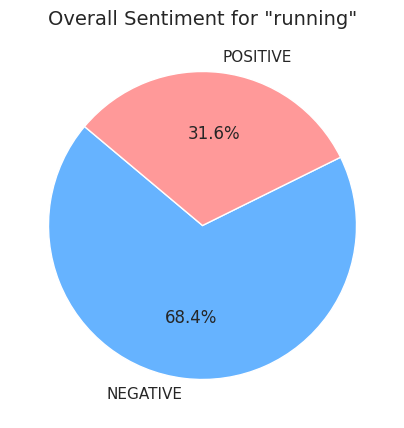

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
if 'clean_df' in locals() and 'sentiment_label' in clean_df.columns:
    sentiment_counts = clean_df['sentiment_label'].value_counts()
    plt.figure(figsize=(5,5))
    plt.pie(
        sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        colors=['#66b3ff', '#ff9999'],
        startangle=140,
        wedgeprops={'edgecolor': 'white'}
    )
    plt.title(f'Overall Sentiment for "{topic}"', fontsize=14)
    plt.show()
else:
    print('Run the Sentiment Analysis cell first to generate this plot.')

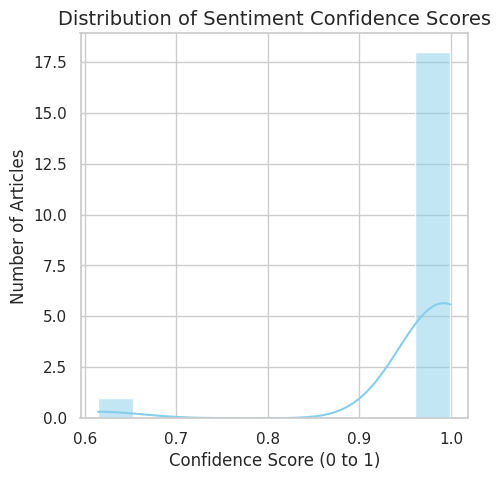

In [8]:
if 'clean_df' in locals() and 'sentiment_score' in clean_df.columns:
    plt.figure(figsize=(5, 5))
    sns.histplot(clean_df['sentiment_score'], bins=10, kde=True, color='skyblue')
    plt.title('Distribution of Sentiment Confidence Scores', fontsize=14)
    plt.xlabel('Confidence Score (0 to 1)')
    plt.ylabel('Number of Articles')
    plt.show()
else:
    print('Sentiment scores not found. Ensure the analysis cell has finished running.')